In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as sci
import os

cwd = os.getcwd()
file = 'A_Z Handwritten Data.csv'

data = pd.read_csv(os.path.normcase(os.path.join(cwd, file)))
#"C:/Users/onlyu/OneDrive/Desktop/College/PnS/Codes/Mini Project/A_Z Handwritten Data/A_Z Handwritten Data.csv"

csvDataset = np.array(data)
gaussians = dict()
probOfACLass = dict()

X, y = csvDataset[:, 1:], csvDataset[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = np.array(X_train)
X_train = X_train/255.0  # normalize the dataset to nullify the bias of pixel values
X_test = np.array(X_test)
X_test = X_test/255.0
labelSet = set(y_train)


In [2]:
def training():
    for c in labelSet:
        gaussians[c] = dict()
        current_X = X_train[y_train == c]
        # each pixel will for each class would follow a gaussian distribution which centers around the mean and variance (in terms of covariance matrix: diagonal elements are variance) of the training data's pixel position for that class(A to Z) as calculated below
        gaussians[c]['mean'] = current_X.mean(axis=0)
        gaussians[c]['var'] = current_X.var(axis=0)+1e-2
        # prior probability
        probOfACLass[c] = float(len(current_X))/len(y_train)


training()


In [3]:
def predict():
    N = X_test.shape
    Probabilties = np.zeros((N[0], len(gaussians)))
    for i in gaussians.keys():
        mean = gaussians[i]['mean']
        var = gaussians[i]['var']
        # likelihood that the given input is from the given class with given mean and variance
        Probabilties[:, i] = sci.multivariate_normal.logpdf(
            X_test, mean=mean, cov=var)
        Probabilties[:, i] += np.log(probOfACLass[i])
    #maximum a posteriori     
    return (np.argmax(Probabilties, axis=1))

pred = predict()

In [4]:
def printMatrix(confusionMatrix):
    #formatted matrix
    print("Confusion matrix:")
    for row in confusionMatrix:
        for col in row:
            print("{:5}".format(col), end=" ")
        print("")


In [5]:
def test():
    correct = 0
    #pred = predict()
    confusionMatrix = np.zeros((26, 26), dtype=int)
    for i in range(len(pred)):
        confusionMatrix[y_test[i]][pred[i]] += 1
        #if predition is same as test data's class label
        if (pred[i] == y_test[i]):
            correct += 1
    print("Accurate Accuracy: ", correct/i*100.0)
    printMatrix(confusionMatrix)


test()


Accurate Accuracy:  69.49307270969821
Confusion matrix:
 1035    18     0     1     4     0    15    19     0     2    12     0    68    23     0    26    19    30     0     1     0     9    10    26    76     1 
   23   619     2    30    11     0    12    12     3    24     1     1    13    10    21     3     5     4    12     4     2     1     3     2    26    14 
    1    30  1573     0    76    12    34     0     0     1    16   203    27     9   144    55    30     8     0    27     9     0    59     1    21     3 
   14    46     0   728     0     0     1     0     1    40     0     3     9     3   121    15    11     0     3     0     8     1    13     2    20     8 
   18    48    26     4   637    15    35     0    13     0    47    77    23    12     9    52     3    46    11    19     5     0     8     1    16     8 
    1     0     0     0     1   113     0     0     0     0     1     0     0     0     0     4     0     0     0     1     0     0     0     0     0     0 
  

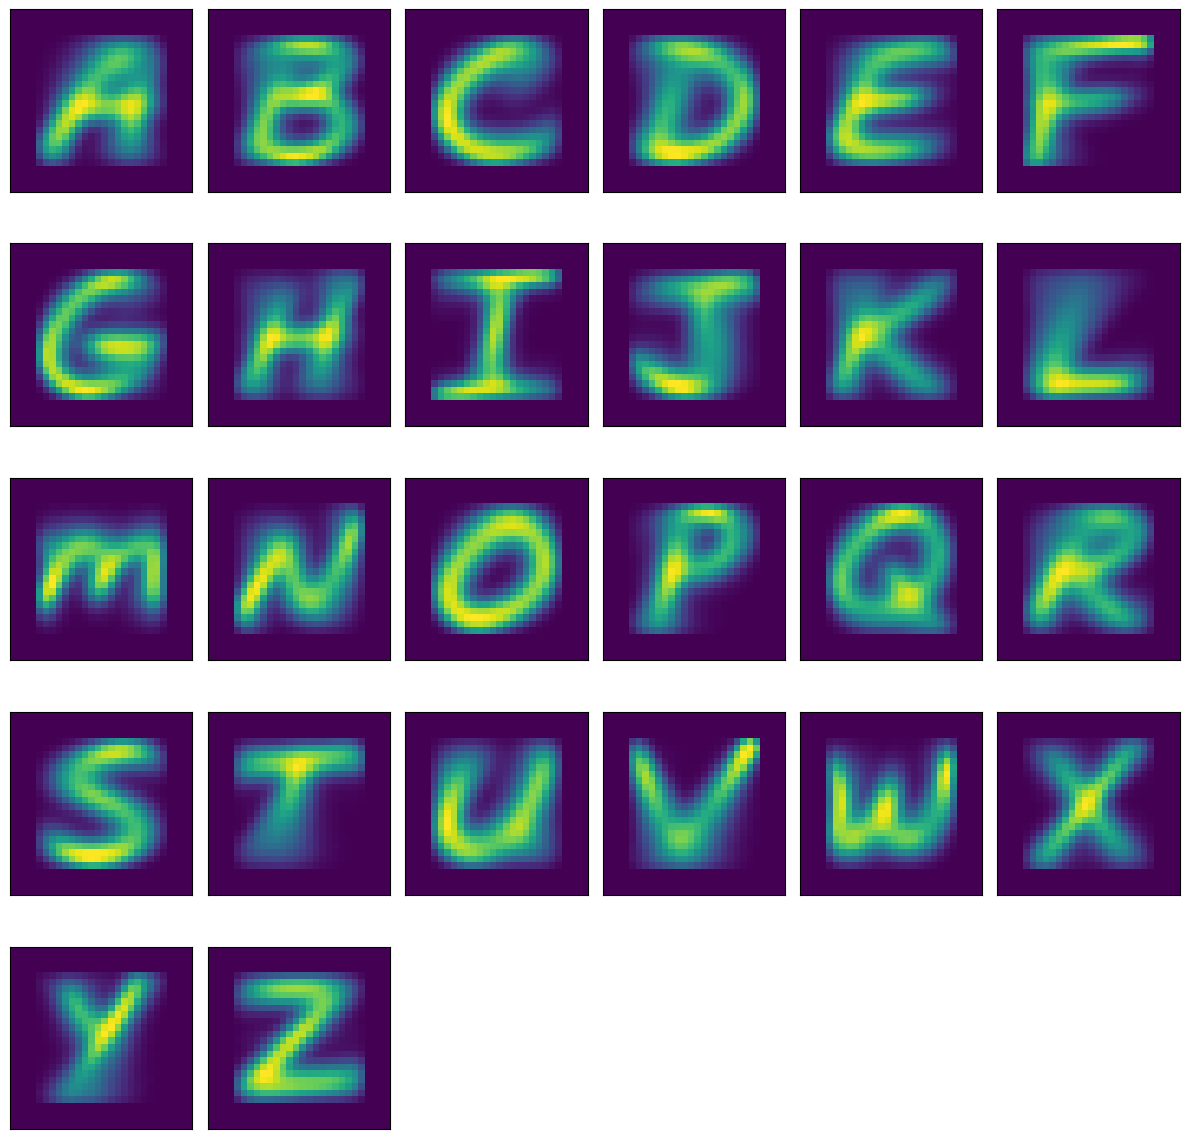

In [6]:
def plotAvg():
    fig = plt.figure(figsize=(12, 12))

    for c in labelSet:
        #regaining the pixel value
        pixel = (gaussians[c]['mean'])*255
        pixel = pixel.reshape(28, 28)
        figure = fig.add_subplot(5, 6, c+1)
        figure.tick_params(left=False, right=False, labelleft=False,
                           labelbottom=False, bottom=False)
        figure.imshow(pixel)

    plt.tight_layout()

    plt.show()


plotAvg()
